In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [8]:
heart_disease = pd.read_csv('C:/Users/eilon_bd/תוכן מקצועי/Python Projects/heart_disease/heart_disease.csv')
heart_disease.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [9]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
heart_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [11]:
heart_disease.corr().T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


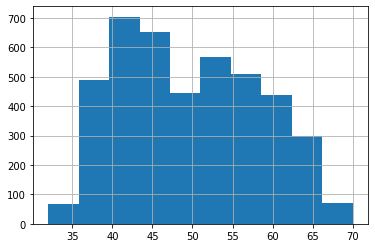

In [12]:
heart_disease.age.hist()

# Data Cleaning

In [13]:
heart_disease.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

fill nan with education:
we use the other feature with the highest correlation within educaion.
then we dived the age into bins, create probability for education for each age group
and filled up the education nulls.


In [14]:
heart_disease.corr().education.abs().sort_values(ascending=False)

education          1.000000
age                0.165883
BMI                0.137504
sysBP              0.129631
prevalentHyp       0.081970
diaBP              0.062316
heartRate          0.054206
TenYearCHD         0.054059
diabetes           0.038680
glucose            0.035721
prevalentStroke    0.035112
totChol            0.023115
currentSmoker      0.018532
male               0.017352
BPMeds             0.010815
cigsPerDay         0.008085
Name: education, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247EC84AA88>,
      dtype=object)

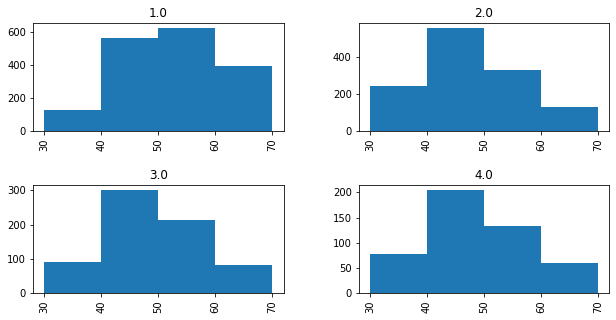

In [15]:
heart_disease.age.hist(by=heart_disease.education,figsize=(10,5),bins=[30,40,50,60,70] )

In [16]:
heart_disease.age.unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69], dtype=int64)

In [17]:
heart_disease["age_group"]=np.floor(heart_disease.age/10)-2
heart_disease.loc[heart_disease["age_group"]>4,"age_group"]=4
heart_disease.age_group.value_counts()

2.0    1660
3.0    1333
4.0     690
1.0     555
Name: age_group, dtype: int64

In [18]:
education_df=pd.DataFrame(columns=[1,2,3,4], index=[1,2,3,4])

In [19]:
### count with each catagory
for i in range(1,5):
    for j in range(1,5):
        education_df.iloc[j-1,i-1]= heart_disease[(heart_disease.education==j)&(heart_disease.age_group==i)].age_group.count()
education_df

,1,2,3,4
1,131,566,625,398
2,243,554,328,128
3,91,300,213,83
4,77,204,133,59


In [20]:
education_df_true=education_df.copy()

In [21]:
for i in range(1,5):
    for j in range (1,5):
        education_df_true.iloc[j-1,i-1]=(education_df.iloc[j-1,i-1]/sum(education_df[i]))
education_df_true

,1,2,3,4
1,0.241697,0.348522,0.481139,0.595808
2,0.448339,0.341133,0.252502,0.191617
3,0.167897,0.184729,0.163972,0.124251
4,0.142066,0.125616,0.102386,0.0883234


In [22]:
heart_disease
df1=heart_disease[(heart_disease.age_group==1)]
df2=heart_disease[(heart_disease.age_group==2)]
df3=heart_disease[(heart_disease.age_group==3)]
df4=heart_disease[(heart_disease.age_group==4)]

In [23]:
df1.fillna(value={'education':np.random.choice(np.arange(1, 5), p=list(education_df_true[1]))},inplace=True)
df2.fillna(value={'education':np.random.choice(np.arange(1, 5), p=list(education_df_true[2]))},inplace=True)
df3.fillna(value={'education':np.random.choice(np.arange(1, 5), p=list(education_df_true[3]))},inplace=True)
df4.fillna(value={'education':np.random.choice(np.arange(1, 5), p=list(education_df_true[4]))},inplace=True)

C:\Users\eilon_bd\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
heart_disease1=pd.concat([df1,df2,df3,df4])

In [25]:
heart_disease1.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
age_group            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247EC9D5588>,
      dtype=object)

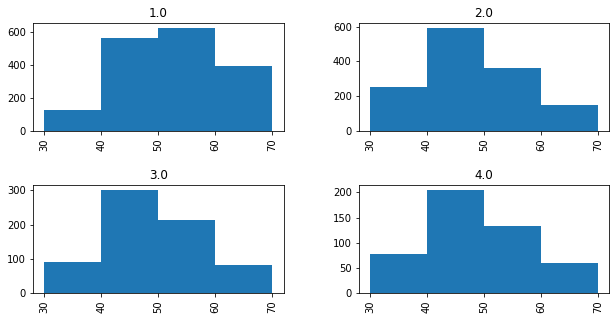

In [26]:
heart_disease1.age.hist(by=heart_disease1.education,figsize=(10,5),bins=[30,40,50,60,70] )

fill nan with cigsPerDay:
we started by checking that for each record with nan, the feature "currentSmoked" equel to 1 (otherwise we needed to fill 0 where is nan). 
later, we generate the feather parameters (mean, median and std) and used value counts in order to understand the data.
when we saw that the median is the most frequent value (726 times, 545 times more then the second frequent value), we decided to fill the nulls with the median

In [27]:
heart_disease1[ (heart_disease1.cigsPerDay.isna()==True)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
3108,1,39,2.0,1,NaN,0.0,0,0,0,285.0,121.0,82.0,27.62,85.0,65.0,0,1.0
3156,1,37,3.0,1,NaN,0.0,0,0,0,188.0,123.5,77.0,26.62,65.0,80.0,0,1.0
3942,0,39,3.0,1,NaN,0.0,0,0,0,197.0,126.5,76.5,19.71,55.0,63.0,0,1.0
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0,2.0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1,2.0
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0,2.0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0,2.0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0,2.0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0,2.0
1963,1,45,3.0,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0,2.0


In [28]:
print("mean: ",heart_disease1[(heart_disease1.currentSmoker==1)]['cigsPerDay'].mean())
print("std: ",heart_disease1[(heart_disease1.currentSmoker==1)]['cigsPerDay'].std())
print("median: ",heart_disease1[(heart_disease1.currentSmoker==1)]['cigsPerDay'].median())

mean:  18.350605326876515
std:  10.865950341025728
median:  20.0


In [29]:
heart_disease1[(heart_disease1.currentSmoker==1)].cigsPerDay.value_counts()

20.0    734
30.0    217
15.0    210
10.0    143
9.0     130
5.0     121
3.0     100
40.0     80
1.0      67
43.0     56
25.0     55
35.0     22
2.0      18
6.0      18
7.0      12
60.0     11
8.0      11
4.0       9
18.0      8
17.0      7
50.0      6
23.0      6
11.0      5
16.0      3
45.0      3
12.0      3
13.0      3
19.0      2
14.0      2
38.0      1
29.0      1
70.0      1
Name: cigsPerDay, dtype: int64

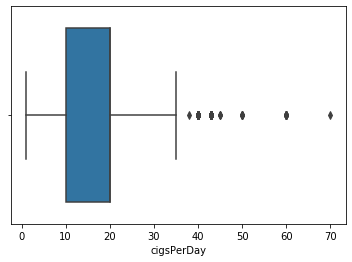

In [30]:
sns.boxplot(heart_disease1[(heart_disease1.currentSmoker==1)]['cigsPerDay'])

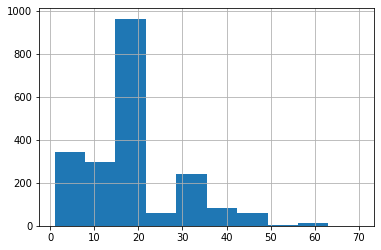

In [31]:
heart_disease1[(heart_disease1.currentSmoker==1)]['cigsPerDay'].hist()

In [32]:
heart_disease1.fillna(value={'cigsPerDay':heart_disease1[(heart_disease1.currentSmoker==1)]['cigsPerDay'].median()},inplace=True)

fill nan with BPMeds:
at the beginning, we used "corr" and "value counts" for better understanding of the feature.
when we saw there is no strong link with other features and there is no strong correlation to the target, we used probabilities to fill the nulls.

In [33]:
heart_disease.corr().BPMeds.abs().sort_values(ascending=False)

BPMeds             1.000000
prevalentHyp       0.261187
sysBP              0.254219
diaBP              0.194227
age                0.122995
prevalentStroke    0.117365
age_group          0.106988
BMI                0.100668
TenYearCHD         0.087489
totChol            0.080558
male               0.052506
diabetes           0.052047
glucose            0.051176
currentSmoker      0.048938
cigsPerDay         0.046134
heartRate          0.015233
education          0.010815
Name: BPMeds, dtype: float64

In [34]:
heart_disease1.BPMeds.value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

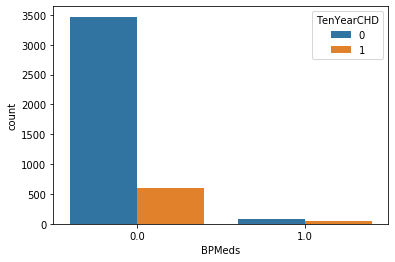

In [35]:
sns.countplot(x=heart_disease1.BPMeds,data=heart_disease,hue='TenYearCHD')

In [36]:
prob_one=1-heart_disease1.BPMeds.value_counts().iloc[0]/len(heart_disease1)
prob_zero=heart_disease1.BPMeds.value_counts().iloc[0]/len(heart_disease1)
print(prob_zero,prob_one)

0.9582350165172251 0.04176498348277491


In [37]:
heart_disease1.fillna(value={'BPMeds':np.random.choice(np.arange(2), p=[prob_zero,prob_one])},inplace=True)

fill nan with totChol:
similary to the educaion feature fill, after the examination of the corr, we used the "age" feature and created new table of means for each age group to fill the nulls.

In [38]:
heart_disease1.corr().totChol.abs().sort_values(ascending=False)

totChol            1.000000
age                0.262131
age_group          0.251458
sysBP              0.208908
diaBP              0.165182
prevalentHyp       0.163993
BMI                0.115767
heartRate          0.091125
TenYearCHD         0.082184
BPMeds             0.079666
male               0.070322
currentSmoker      0.046562
glucose            0.046408
diabetes           0.040278
cigsPerDay         0.025099
education          0.022586
prevalentStroke    0.000067
Name: totChol, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247ECE0F588>,
      dtype=object)

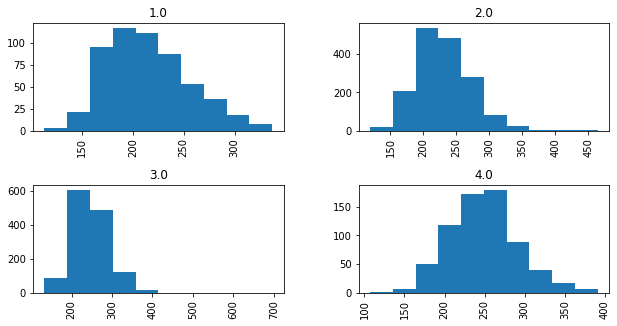

In [39]:
heart_disease1.totChol.hist(by=heart_disease.age_group,figsize=(10,5))

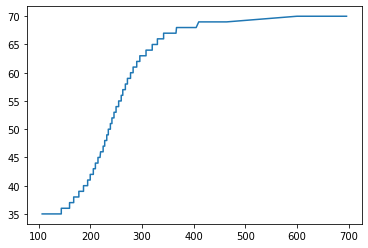

In [40]:
plt.plot(heart_disease1.totChol.sort_values(ascending=False),heart_disease1.age.sort_values(ascending=False))

In [41]:
df_means=pd.DataFrame(heart_disease1.groupby(heart_disease1.age_group).totChol.mean())

In [42]:
for i,v in heart_disease1.iterrows():
    if (pd.isnull(v.totChol)==True):
        heart_disease1.loc[i,'totChol']=df_means.loc[v.age_group].values

In [43]:
heart_disease1.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
age_group            0
dtype: int64

fill nan with BMI:
at the start, we used value counts, corr and pairplot in order to understand the data.
later, we saw there is no "sure" way to fill the nulls by usings other features, the link was to week.
when we make sure that most of the values are around the median and there is no influnce on the target, we decided to fill the nulls with the median

In [44]:
heart_disease1[(heart_disease1.BMI.isna()==True)].TenYearCHD.value_counts()

1    10
0     9
Name: TenYearCHD, dtype: int64

In [46]:
heart_disease1.corr().BMI.abs().sort_values(ascending=False)

BMI                1.000000
diaBP              0.377588
sysBP              0.326981
prevalentHyp       0.301318
currentSmoker      0.167650
age                0.135800
education          0.135786
age_group          0.132351
totChol            0.115932
BPMeds             0.100046
cigsPerDay         0.092252
glucose            0.087377
diabetes           0.087036
male               0.081672
TenYearCHD         0.075192
heartRate          0.067678
prevalentStroke    0.025891
Name: BMI, dtype: float64

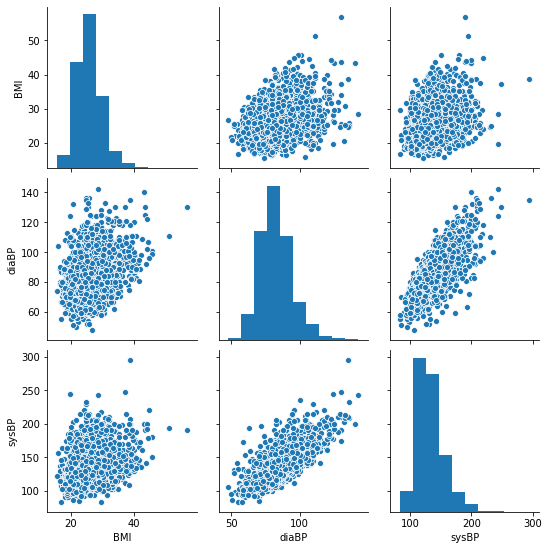

In [47]:
sns.pairplot(heart_disease1[['BMI','diaBP','sysBP']])

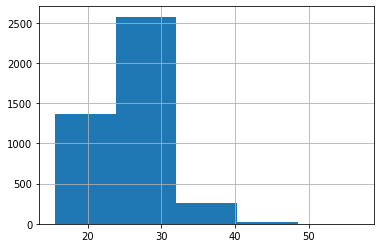

In [48]:
heart_disease1.BMI.hist(bins=5)

In [49]:
print("median for y=1: ",heart_disease1[(heart_disease1.TenYearCHD==1)]['BMI'].median())
print("median for y=0: ",heart_disease1[(heart_disease1.TenYearCHD==0)]['BMI'].median())
print("median: ",heart_disease1['BMI'].median())

median for y=1:  26.155
median for y=0:  25.25
median:  25.4


In [50]:
heart_disease1.fillna(value={'BMI':heart_disease1['BMI'].median()},inplace=True)

heartRate:
we decided to drop the record with the null value since there is only 1 record

In [51]:
heart_disease1.shape

(4238, 17)

In [52]:
heart_disease1.dropna(subset=['heartRate'],inplace=True)

In [53]:
heart_disease1.shape

(4237, 17)

fill nan with glucose:
that was the feature with the higher number of nulls (388).
for start, we used value counts and saw that in only 4 cases the target is 1 and in those cases the std was very high (mean:170, std:84) so we decided to drop those records.
for the other 384 records, the distplot help us to saw that the data behave normaly so we generate mean, std and filled the nulls with random number from normal disterbution

In [54]:
heart_disease1.corr().glucose.abs().sort_values(ascending=False)

glucose            1.000000
diabetes           0.617657
sysBP              0.140506
TenYearCHD         0.125406
age                0.122139
age_group          0.116583
heartRate          0.094500
prevalentHyp       0.086715
BMI                0.086216
diaBP              0.061301
cigsPerDay         0.057933
currentSmoker      0.056935
BPMeds             0.050982
totChol            0.046434
education          0.035199
prevalentStroke    0.018439
male               0.005974
Name: glucose, dtype: float64

In [55]:
print("mean:", heart_disease1.groupby(heart_disease1.diabetes).mean().glucose,'\n')
print("median:", heart_disease1.groupby(heart_disease1.diabetes).median().glucose,'\n')
print("std:", heart_disease1.groupby(heart_disease1.diabetes).std().glucose,'\n')

mean: diabetes
0     79.486111
1    170.333333
Name: glucose, dtype: float64 

median: diabetes
0     78.0
1    145.0
Name: glucose, dtype: float64 

std: diabetes
0    12.960443
1    84.232242
Name: glucose, dtype: float64 



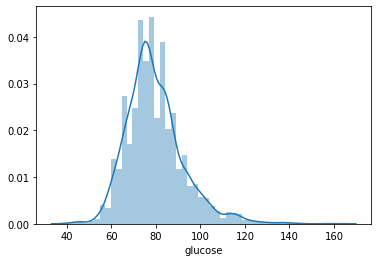

In [56]:
sns.distplot(heart_disease1[heart_disease1.diabetes==0].glucose)

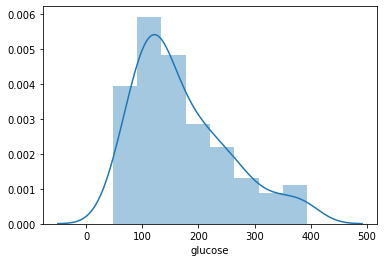

In [57]:
sns.distplot(heart_disease1[heart_disease1.diabetes==1].glucose)

In [58]:
heart_disease1[(heart_disease1.glucose.isna()==True)].diabetes.value_counts()

0    384
1      4
Name: diabetes, dtype: int64

In [59]:
for i,v in heart_disease1.iterrows():
    if ((pd.isnull(v.glucose)==True)&(v.diabetes==0)):
        heart_disease1.loc[i,'glucose']=np.random.normal(heart_disease1[(heart_disease1.diabetes==0)].glucose.mean()\
                   ,heart_disease1[(heart_disease1.diabetes==0)].glucose.std())

In [60]:
heart_disease1.dropna(subset=['glucose'],inplace=True)

In [61]:
heart_disease1.shape

(4233, 17)

In [62]:
print("mean:", heart_disease1.groupby(heart_disease1.diabetes).mean().glucose,'\n')
print("median:", heart_disease1.groupby(heart_disease1.diabetes).median().glucose,'\n')
print("std:", heart_disease1.groupby(heart_disease1.diabetes).std().glucose,'\n')

mean: diabetes
0     79.609689
1    170.333333
Name: glucose, dtype: float64 

median: diabetes
0     78.0
1    145.0
Name: glucose, dtype: float64 

std: diabetes
0    12.897715
1    84.232242
Name: glucose, dtype: float64 



# Data Visualisation

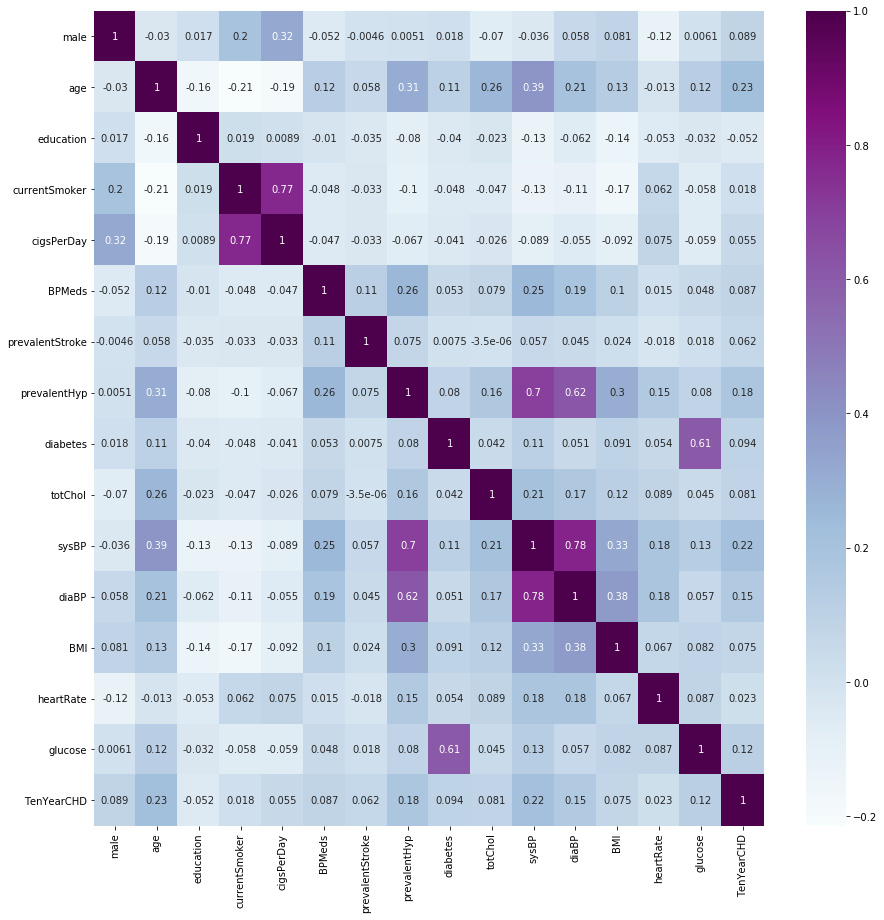

In [63]:
plt.figure(figsize = (15,15))
sns.heatmap(heart_disease1.drop('age_group',axis=1).corr(),cmap="BuPu",annot=True)

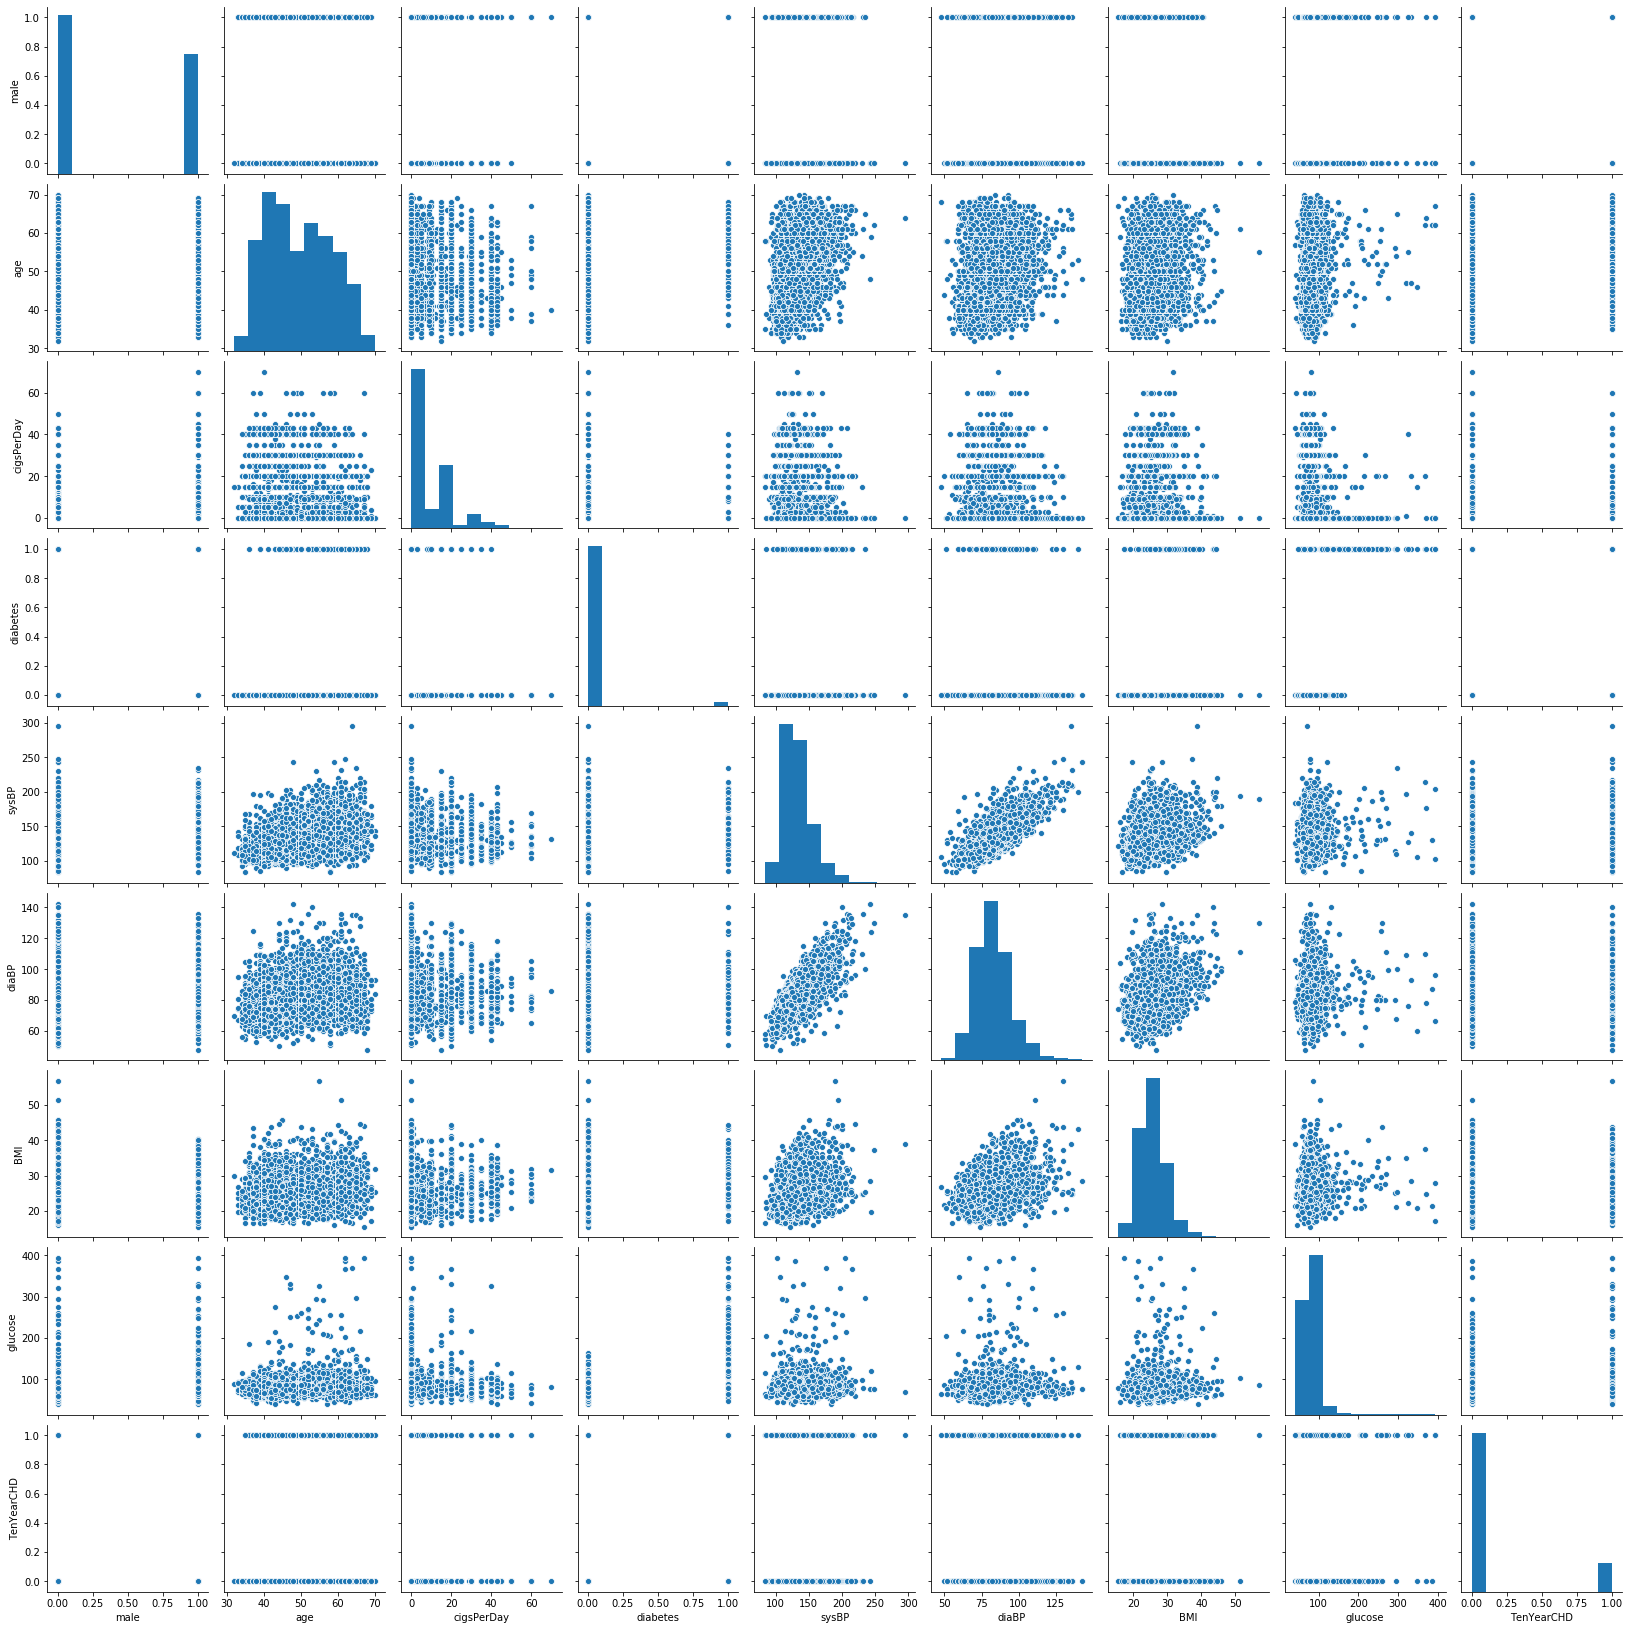

In [64]:
sns.pairplot(heart_disease1.drop(['age_group','heartRate','prevalentHyp','prevalentStroke','BPMeds','currentSmoker','totChol','education'],axis=1))

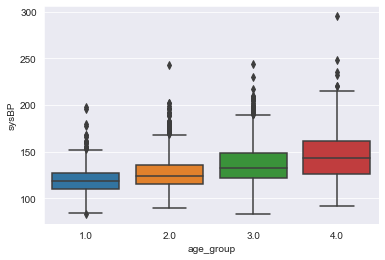

In [61]:
sns.set_style('darkgrid')
sns.boxplot(x=heart_disease1.age_group,y=heart_disease1.sysBP,data=heart_disease1)

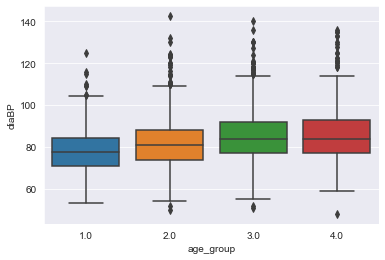

In [62]:
sns.boxplot(x=heart_disease1.age_group,y=heart_disease1.diaBP,data=heart_disease1)

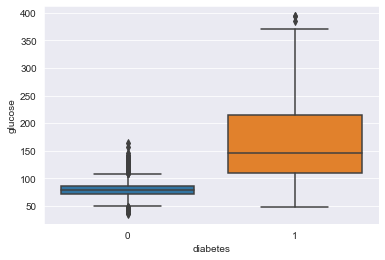

In [63]:
sns.set_style('darkgrid')
sns.boxplot(x=heart_disease1.diabetes,y=heart_disease1.glucose,data=heart_disease1,)

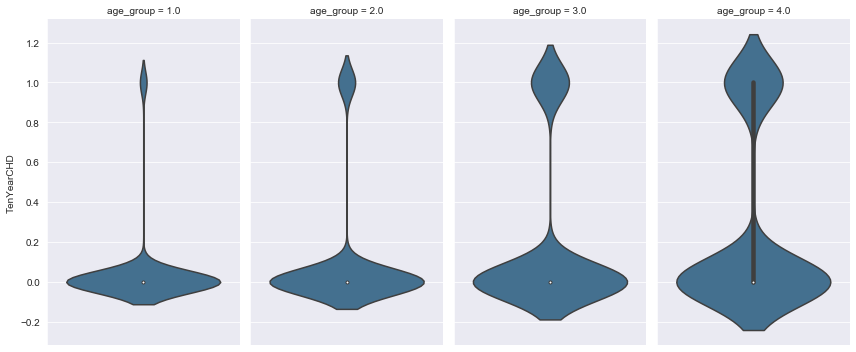

In [64]:
vioplot=sns.catplot(y="TenYearCHD", col="age_group",data=heart_disease1, saturation=.5,kind="violin", ci=None, aspect=.6,margin_titles=True)

<Figure size 720x720 with 0 Axes>

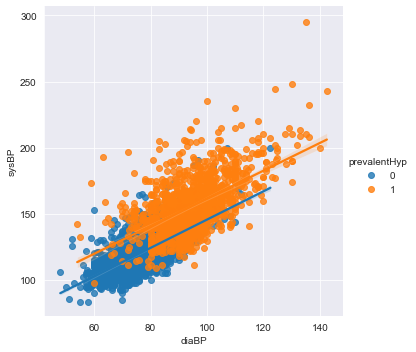

In [65]:
plt.figure(figsize = (10,10))
sns.lmplot(x="diaBP", y="sysBP", hue='prevalentHyp', data=heart_disease1)

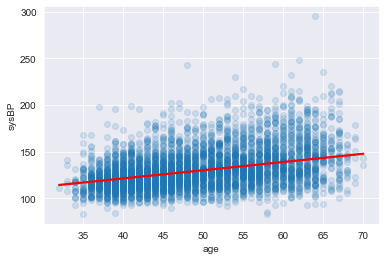

In [66]:
sns.regplot(x='age', y='sysBP', lowess=True, data=heart_disease1, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})

In [65]:
df1= heart_disease1.reset_index()
df1.drop('index',axis=1,inplace=True)
df1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0,1.0
1,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,90.441533,0,1.0
2,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.000000,1,1.0
3,0,38,2.0,1,5.0,0.0,0,0,0,195.0,122.0,84.5,23.24,75.0,78.000000,0,1.0
4,1,35,2.0,1,20.0,0.0,0,1,0,225.0,132.0,91.0,26.09,73.0,83.000000,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,1,65,2.0,0,0.0,0.0,0,0,0,286.0,135.0,80.0,28.06,70.0,116.000000,0,4.0
4229,0,63,1.0,0,0.0,0.0,0,1,1,236.0,155.0,82.0,39.17,78.0,79.000000,0,4.0
4230,0,63,1.0,0,0.0,0.0,0,1,0,266.0,167.0,94.0,25.23,95.0,94.000000,0,4.0
4231,1,60,1.0,0,0.0,0.0,0,0,0,252.0,128.0,82.0,21.18,75.0,70.000000,1,4.0


In [66]:
df1.to_csv(r'C:/Users/eilon_bd/תוכן מקצועי/Python Projects/heart_disease/heart_disease_after_prep.csv')